Using Keras to Load the Dataset

In [0]:
import keras

Using TensorFlow backend.


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)  = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


shape

In [0]:
X_train_full.shape

(60000, 28, 28)

In [0]:
X_train_full.dtype

dtype('uint8')

scale the pixel intensities down to the 0-1 range by dividing them by 255.0 

In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Class Names


In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
class_names[y_train[0]]

'Coat'

Creating the Model Using the Sequential API

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers

In [0]:
model.layers[1].name

'dense_1'

In [0]:
model.get_layer('dense_3').name

'dense_3'

Compiling the model

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

Training and Evaluating the Model

In [0]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.7288 - accuracy: 0.7605 - val_loss: 0.5105 - val_accuracy: 0.8340
Epoch 2/30
55000/55000 [==============================] - 6s 101us/step - loss: 0.4923 - accuracy: 0.8287 - val_loss: 0.4710 - val_accuracy: 0.8398
Epoch 3/30
55000/55000 [==============================] - 5s 99us/step - loss: 0.4467 - accuracy: 0.8444 - val_loss: 0.4133 - val_accuracy: 0.8602
Epoch 4/30
55000/55000 [==============================] - 5s 99us/step - loss: 0.4190 - accuracy: 0.8530 - val_loss: 0.4076 - val_accuracy: 0.8574
Epoch 5/30
55000/55000 [==============================] - 6s 100us/step - loss: 0.3973 - accuracy: 0.8607 - val_loss: 0.3899 - val_accuracy: 0.8646
Epoch 6/30
55000/55000 [==============================] - 5s 99us/step - loss: 0.3820 - accuracy: 0.8655 - val_loss: 0.3720 - val_accuracy: 0.8694
Epoch 7/30
55000/55000 [==============================] - 5s 99us/

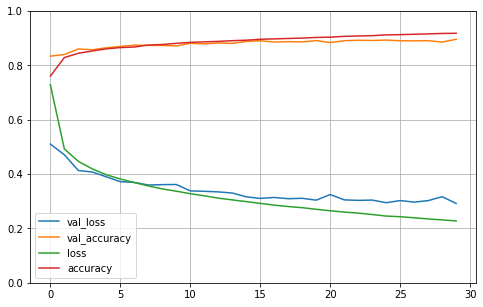

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 36us/step


[72.24365569152832, 0.8366000056266785]

Using the Model to Make Predictions

In [0]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [0]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [0]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)